In [129]:
# %pip install seaborn

In [130]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [131]:
# Make sure the csv is in the same directory
df = pd.read_csv('heart_2020_cleaned.csv')
df.dropna()
pd.set_option('display.max_columns', None)

In [132]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [133]:
print(list(df))

['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [134]:
# ages = pd.get_dummies(df['AgeCategory'])
# diabetes = pd.get_dummies(df['Diabetic'])
# races = pd.get_dummies(df['Race'])
# healths = pd.get_dummies(df['GenHealth'])
categorical_columns = ['AgeCategory', 'Diabetic', 'Race', 'GenHealth']
for cat in categorical_columns:
    dummy = pd.get_dummies(df[cat])
    df = df.join(dummy)
    
df.rename(columns = {'No':'Diabetic_No', 'Yes': 'Diabetic_Yes', 'Yes (during pregnancy)': 'Diabetic_During_Pregnancy', 'No, borderline diabetes': 'Borderline_Diabetes'}, inplace = True)
df.rename(columns = {'Excellent': 'Excellent_Health', 'Fair': 'Fair_Health', 'Good': 'Good_Health', 'Poor': 'Poor_Health', 'Very good': 'Very_Good_Health'}, inplace = True)
for cat in categorical_columns:
    df.drop([cat], axis=1, inplace=True)

In [135]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older,Diabetic_No,Borderline_Diabetes,Diabetic_Yes,Diabetic_During_Pregnancy,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Excellent_Health,Fair_Health,Good_Health,Poor_Health,Very_Good_Health
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,Yes,5.0,Yes,No,Yes,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,Yes,7.0,No,No,No,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,Yes,8.0,Yes,No,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,No,6.0,No,No,Yes,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,Yes,8.0,No,No,No,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [136]:
# Only columns that have yes/no values
yes_no_columns = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

# Mapping for yes/no values
yes_no_map = {'Yes': 1, 'No': 0}
male_female_map = {'Male': 1, 'Female': 0}

# Converting that have yes/no values
for cat in yes_no_columns:
    df[cat] = df[cat].map(yes_no_map)
df['Sex'] = df['Sex'].map(male_female_map)

In [137]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older,Diabetic_No,Borderline_Diabetes,Diabetic_Yes,Diabetic_During_Pregnancy,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Excellent_Health,Fair_Health,Good_Health,Poor_Health,Very_Good_Health
0,0,16.60,1,0,0,3.0,30.0,0,0,1,5.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,8.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,6.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,8.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [138]:
print(list(df))

['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', '18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older', 'Diabetic_No', 'Borderline_Diabetes', 'Diabetic_Yes', 'Diabetic_During_Pregnancy', 'American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White', 'Excellent_Health', 'Fair_Health', 'Good_Health', 'Poor_Health', 'Very_Good_Health']


([<matplotlib.patches.Wedge at 0x1e9ca9c6bb0>,
 [Text(1.0604683173239722, 0.29224467138352267, 'Has Heart Disease'),
  Text(-1.0604683446858885, -0.2922445720953119, 'Does Not Have Heart Disease')])

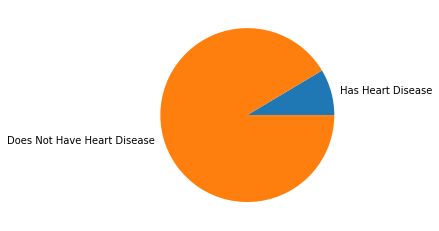

In [139]:
row_heart_yes = df.loc[df['HeartDisease'] == 1]
row_heart_no = df.loc[df['HeartDisease'] == 0]
row_kidney_yes = df.loc[df['KidneyDisease'] == 1]
row_kidney_no = df.loc[df['KidneyDisease'] == 0]
row_diabetes_yes = df['Diabetic_Yes']
row_diabetes_no = df['Diabetic_No']
heart_labels = ['Has Heart Disease', 'Does Not Have Heart Disease']
plt.pie([len(row_heart_yes), len(row_heart_no)], labels = heart_labels)

([<matplotlib.patches.Wedge at 0x1e9ca9fed60>,
 [Text(1.0926438384423367, 0.12700174138175013, 'Has Kidney Disease'),
  Text(-1.0926438458740606, -0.12700167744381283, 'Does Not Have Kidney Disease')])

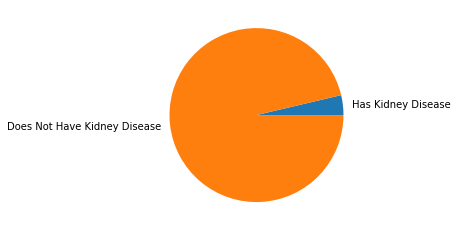

In [140]:
kidney_labels = ['Has Kidney Disease', 'Does Not Have Kidney Disease']
plt.pie([len(row_kidney_yes), len(row_kidney_no)], labels = kidney_labels)

([<matplotlib.patches.Wedge at 0x1e9caa44340>,
 [Text(1.0075622294357416, 0.44138232159260565, 'Has Diabetes'),
  Text(-1.0075622294357416, -0.4413823215926054, 'Does Not Have Diabetes')])

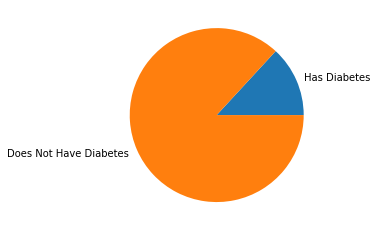

In [141]:
diabetes_labels = ['Has Diabetes', 'Does Not Have Diabetes']
plt.pie([sum(row_diabetes_yes), sum(row_diabetes_no)], labels = diabetes_labels)

In [142]:
# # Sampling the data and making sure that yes and no heart disease are equal
# sample_size_heart = 20000

# sample_heart_yes = row_heart_yes.sample(sample_size_heart)
# sample_heart_no = row_heart_no.sample(sample_size_heart)
# x_train_yes, x_test_yes, y_train_yes, y_test_yes = train_test_split(sample_heart_yes, sample_heart_yes["HeartDisease"], train_size=0.5, test_size=0.5)
# x_train_no, x_test_no, y_train_no, y_test_no = train_test_split(sample_heart_no, sample_heart_no["HeartDisease"], train_size=0.5, test_size=0.5)

# df_test_sample = pd.concat([x_test_yes, x_test_no])

# # df_sample = pd.concat([sample_heart_yes, sample_heart_no])
# df_sample = pd.concat([x_train_yes, x_train_no]) #should save the sampled data into a CSV
# df_sample.corr()


<AxesSubplot:>

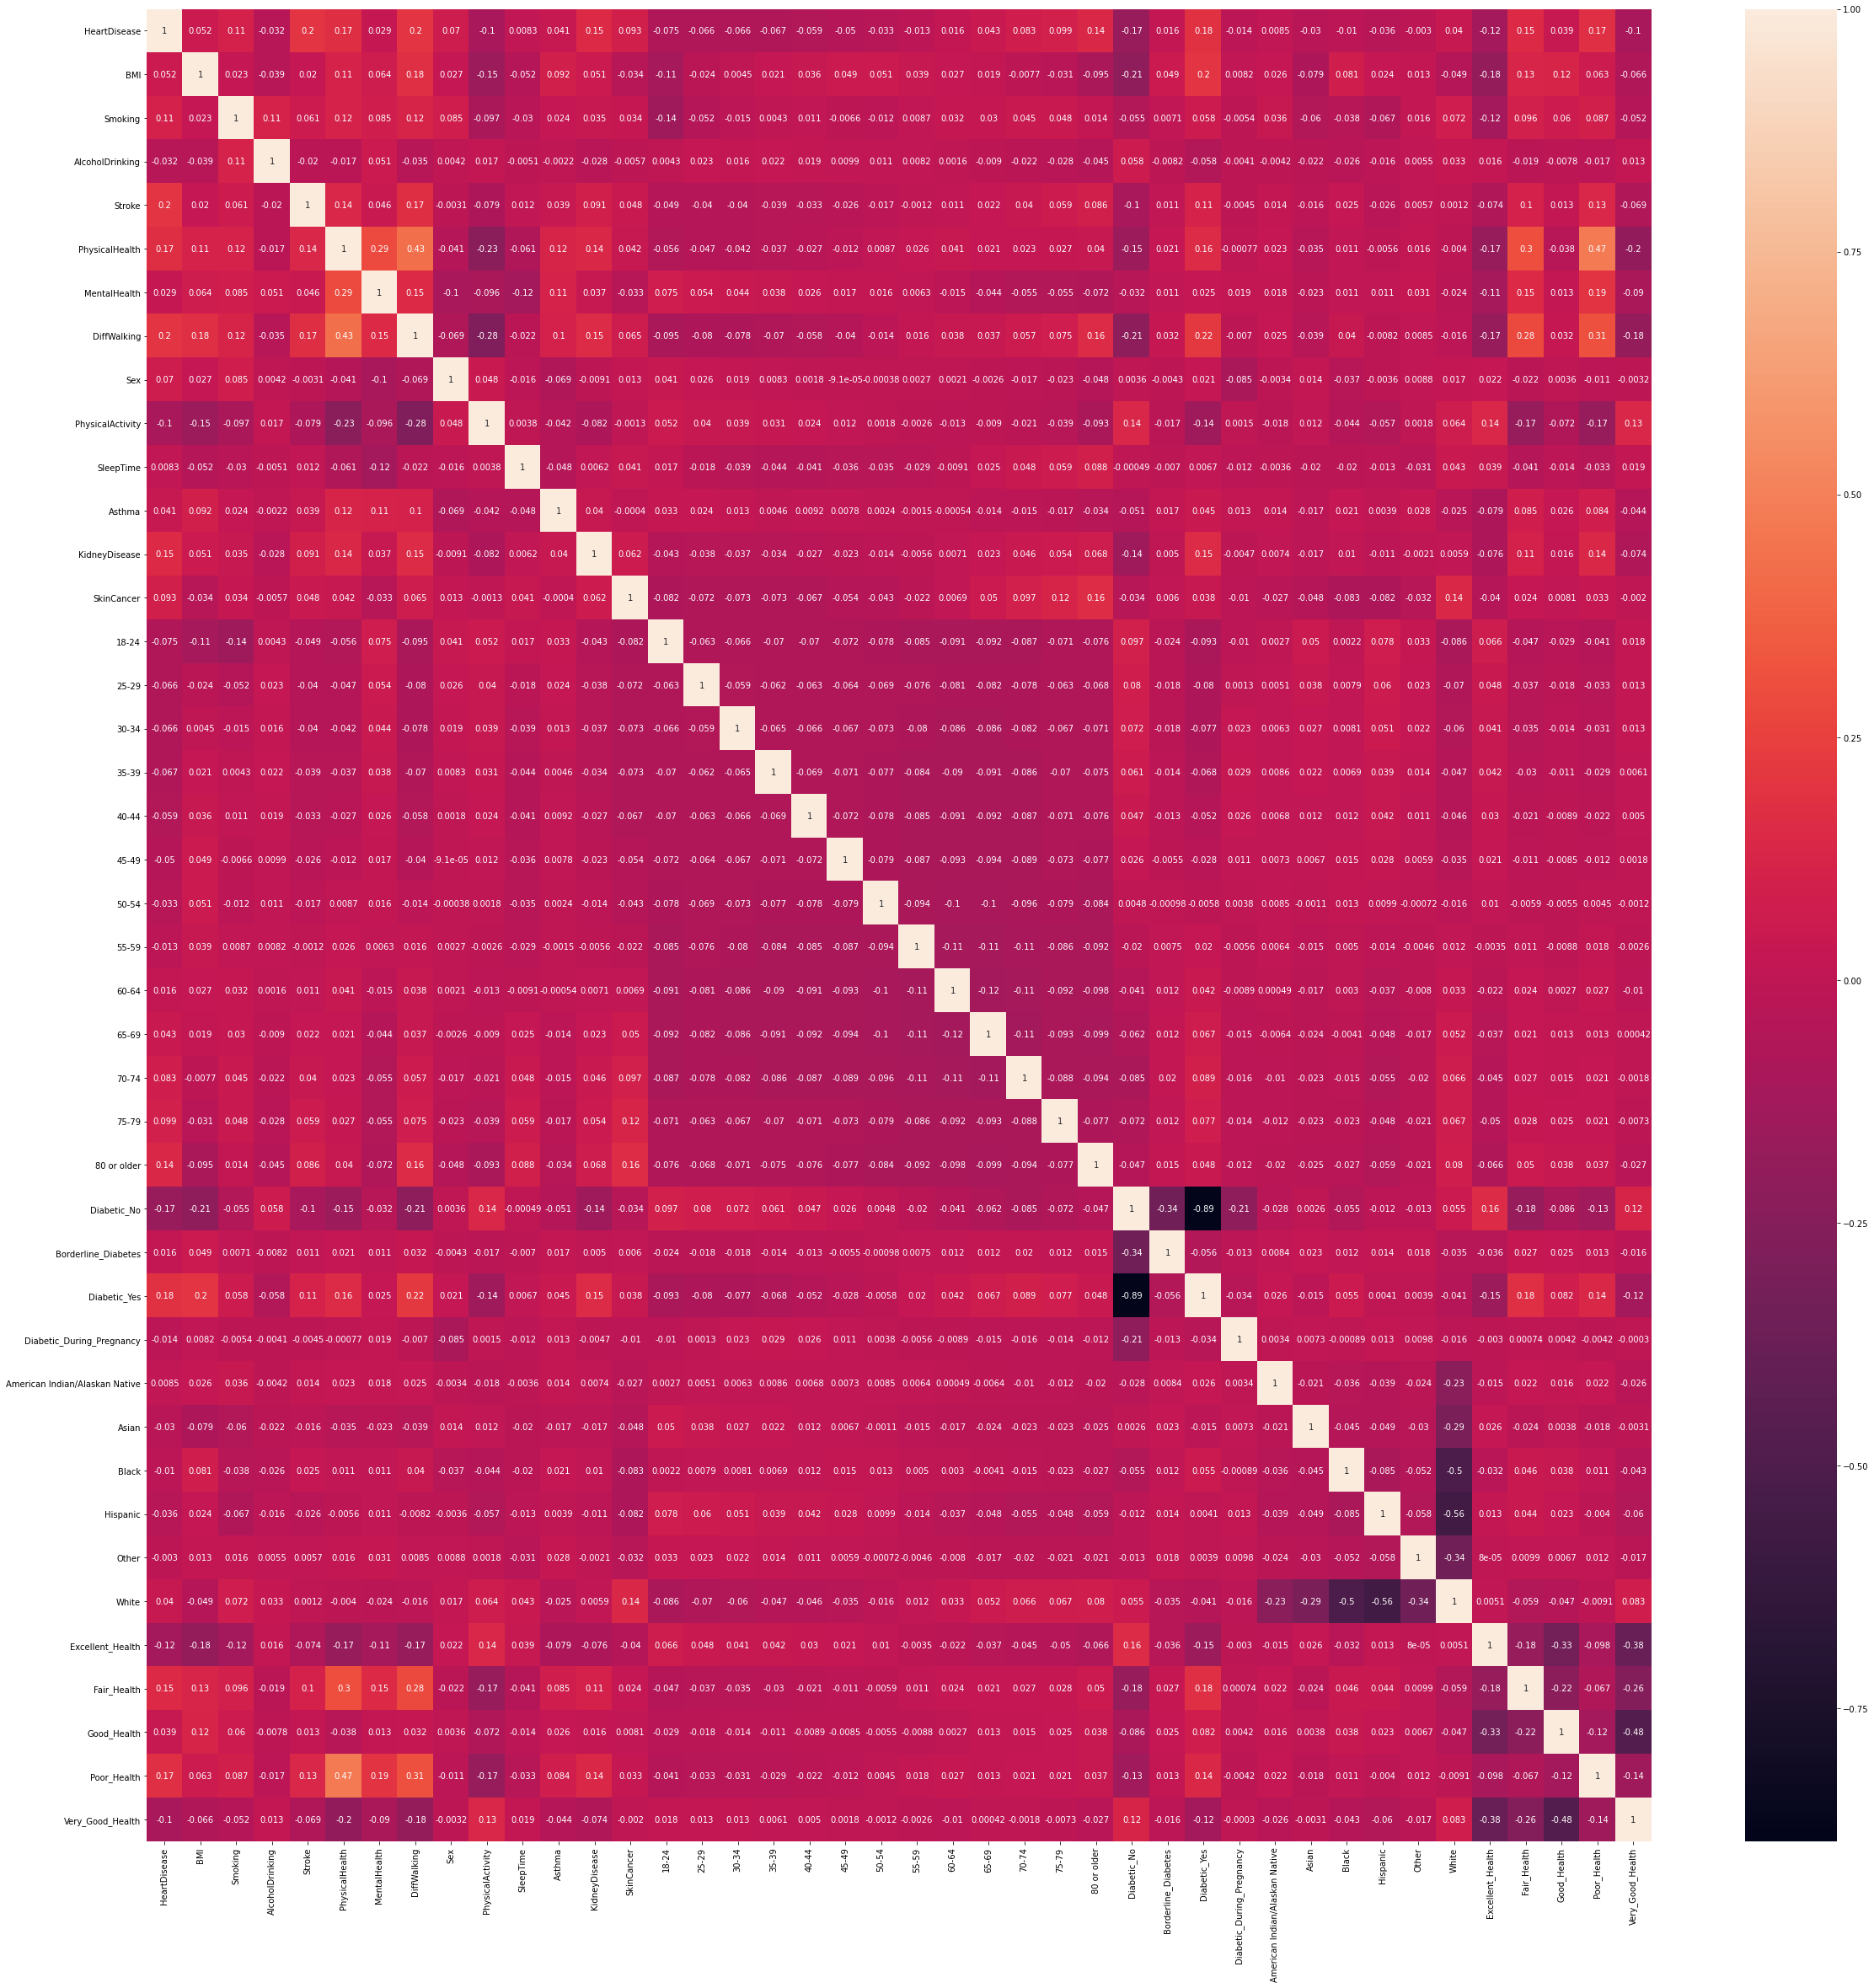

In [143]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), annot=True)

In [144]:
target = 'HeartDisease'

heart_disease_pearson = df.corr('pearson')[[target]].sort_values(by=target, ascending=False)
heart_disease_spearman = df.corr('spearman')[[target]].sort_values(by=target, ascending=False)

print(f"Pearson:\n{heart_disease_pearson[1:10]}")
print(f"Spearman:\n{heart_disease_spearman[1:10]}")

Pearson:
                HeartDisease
DiffWalking         0.201258
Stroke              0.196835
Diabetic_Yes        0.183072
Poor_Health         0.174662
PhysicalHealth      0.170721
Fair_Health         0.147954
KidneyDisease       0.145197
80 or older         0.143041
Smoking             0.107764
Spearman:
                HeartDisease
DiffWalking         0.201258
Stroke              0.196835
Diabetic_Yes        0.183072
Poor_Health         0.174662
Fair_Health         0.147954
KidneyDisease       0.145197
PhysicalHealth      0.143064
80 or older         0.143041
Smoking             0.107764


([<matplotlib.patches.Wedge at 0x1e9d74130d0>,
 [Text(6.735557395310444e-17, 1.1, 'Has Heart Disease'),
  Text(-2.0206672185931328e-16, -1.1, 'Does Not Have Heart Disease')])

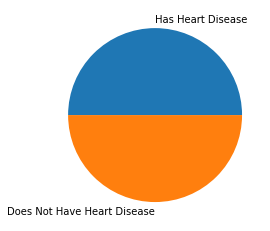

In [145]:
keepThese = ['DiffWalking', 'PhysicalHealth', 'Diabetic_Yes', 'Stroke', 'Poor_Health', 'Fair_Health', '80 or older', 'Smoking', 'KidneyDisease']

X = df[keepThese]
Y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Balancing the data
balancer = RandomUnderSampler()
X_train, y_train = balancer.fit_resample(X_train, y_train)

# Scaling the data for better behavior with models
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

heart_labels = ['Has Heart Disease', 'Does Not Have Heart Disease']
plt.pie([len(df['HeartDisease'] == 1), len(df['HeartDisease'] == 0)], labels = heart_labels)

In [146]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)

print(f"Logistic Regression Mean Accuracy: {log_reg_score}")

Logistic Regression Mean Accuracy: 0.7747313912619295


In [147]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)

print(f"KNN Mean Accuracy: {knn_score}")

KNN Mean Accuracy: 0.8977473139126193


Decision Tree Mean Accuracy: 0.7144554653591665


[Text(0.5, 0.9166666666666666, 'DiffWalking <= 0.602\ngini = 0.5\nsamples = 40856\nvalue = [20428, 20428]\nclass = No HD'),
 Text(0.25, 0.75, 'Diabetic_Yes <= 0.678\ngini = 0.486\nsamples = 30966\nvalue = [18033, 12933]\nclass = No HD'),
 Text(0.125, 0.5833333333333334, '80 or older <= 1.093\ngini = 0.464\nsamples = 25907\nvalue = [16443, 9464]\nclass = No HD'),
 Text(0.0625, 0.4166666666666667, 'Stroke <= 1.415\ngini = 0.442\nsamples = 23377\nvalue = [15681, 7696]\nclass = No HD'),
 Text(0.03125, 0.25, 'Fair_Health <= 0.851\ngini = 0.428\nsamples = 22423\nvalue = [15466, 6957]\nclass = No HD'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.408\nsamples = 20522\nvalue = [14663, 5859]\nclass = No HD'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.488\nsamples = 1901\nvalue = [803, 1098]\nclass = Yes HD'),
 Text(0.09375, 0.25, 'Fair_Health <= 0.851\ngini = 0.349\nsamples = 954\nvalue = [215, 739]\nclass = Yes HD'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.377\nsamples = 734\nval

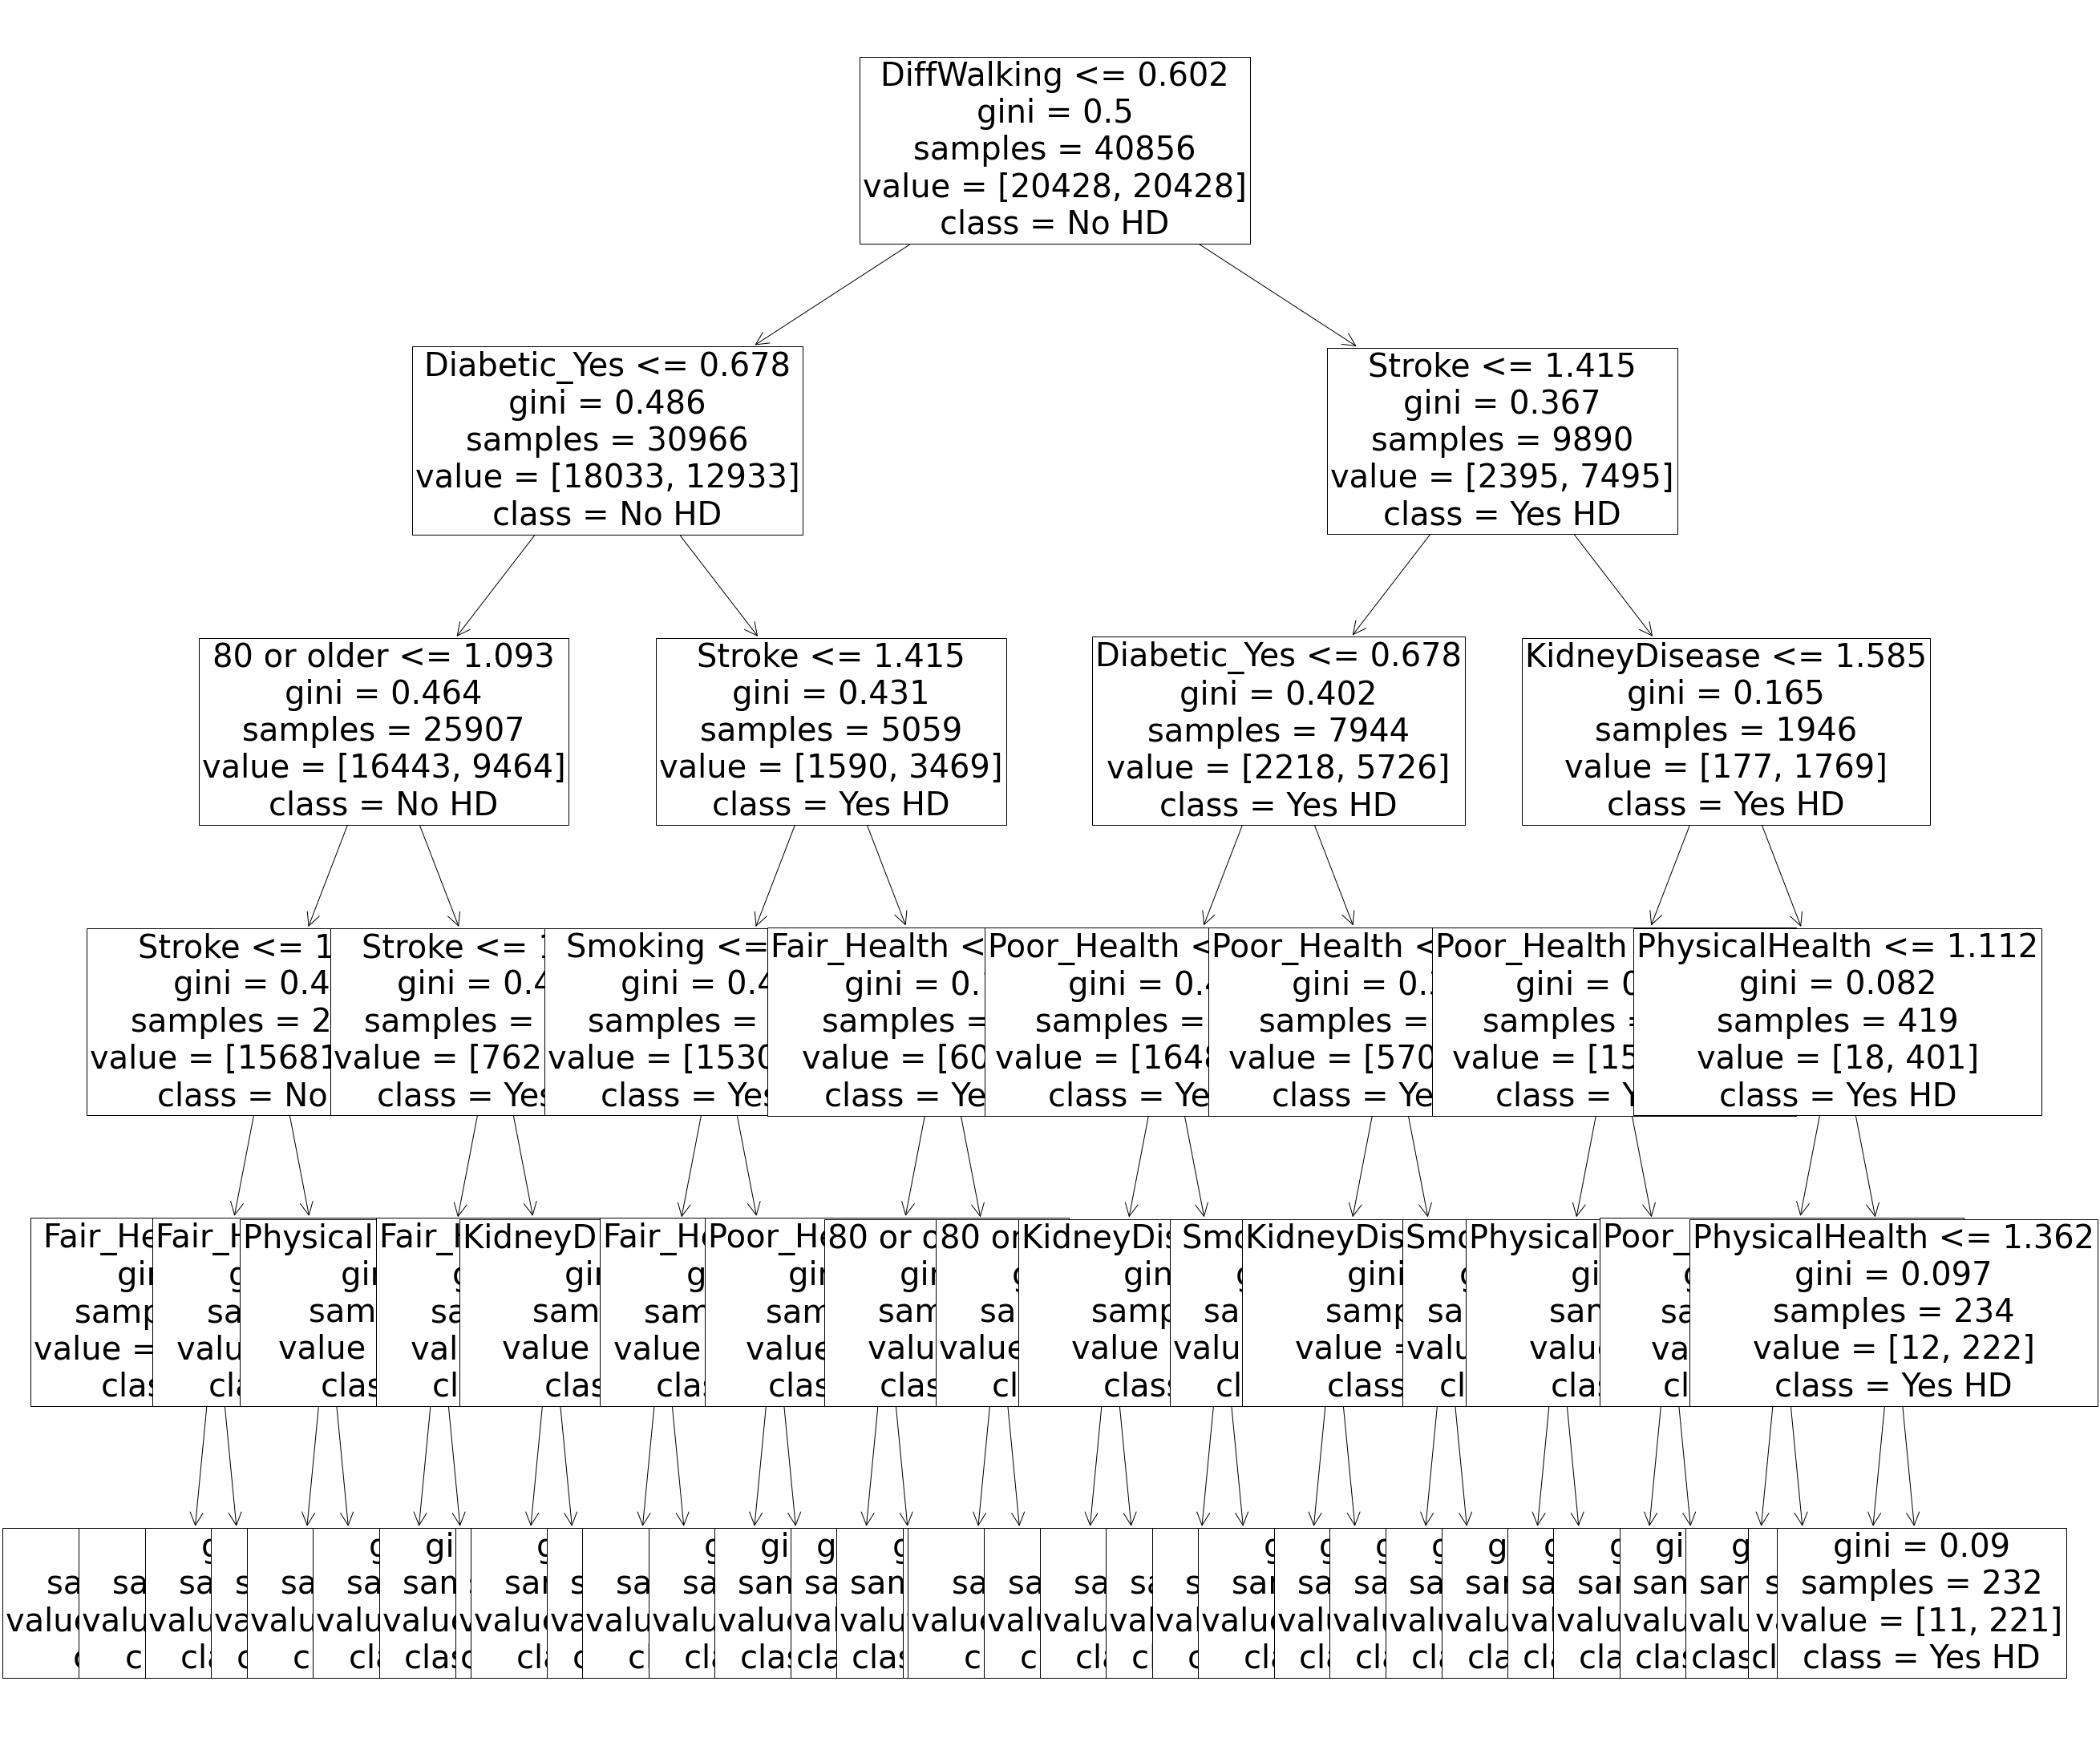

In [150]:
# Decision Tree
dec_tree = tree.DecisionTreeClassifier(max_depth=5)
dec_tree.fit(X_train, y_train)
dec_tree_score = dec_tree.score(X_test, y_test)

print(f"Decision Tree Mean Accuracy: {dec_tree_score}")
# Plotting the tree
plt.figure(figsize=(40,40))
tree.plot_tree(dec_tree, fontsize=40, feature_names=keepThese, class_names=['No HD', 'Yes HD'])

In [149]:
# Ensemble Methods
ensemble = [AdaBoostClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]
ensemble_names = ['AdaBoost', 'RandomForest', 'GradientBoosting']
for i in range(len(ensemble)):
    method = ensemble[i]
    method.fit(X_train, y_train)
    accuracy = method.score(X_test, y_test)
    print(f"{ensemble_names[i]} Accuracy: {accuracy}")


AdaBoost Accuracy: 0.7860761235287496
RandomForest Accuracy: 0.7588337565197814
GradientBoosting Accuracy: 0.7575954671102828
